In [1]:
import os
import matplotlib as plt
import tensorflow as tf


In [2]:
len(os.listdir('images'))

112120

In [4]:
import cv2
img = cv2.imread('images/00000001_000.png')

In [5]:
import matplotlib.pyplot as plt
# plt.imshow(img)

In [6]:
img.shape

(1024, 1024, 3)

In [7]:
import os
import shutil
import pandas as pd

In [8]:
# Set the path to the directory where the images are stored
image_dir = 'images'
csv1 = pd.read_csv('cardio.csv')
csv1_folder = 'cardiomellagy/'
os.makedirs(csv1_folder, exist_ok=True)
for image_name in csv1['Image_Index']:
    image_path = os.path.join(image_dir, image_name)
    shutil.copy(image_path, csv1_folder)

In [9]:
csv2 = pd.read_csv('no.csv')
csv2_folder = 'no/'
os.makedirs(csv2_folder, exist_ok=True)

# Loop through the file names in the second CSV and copy the corresponding images to the new folder
for image_name in csv2['Image_Index']:
    image_path = os.path.join(image_dir, image_name)
    shutil.copy(image_path, csv2_folder)

In [ ]:
urls = os.listdir('images')
urls

In [9]:
path = "images/" + urls[0]

In [10]:
path

'images/00000001_000.png'

In [10]:
import numpy as np

def loadImages(path, urls, target):
  images = []
  labels = []
  for i in range(len(urls)):
    img_path = path + "/" + urls[i]
    img = cv2.imread(img_path)
    img = img / 255.0
    #print(img_path)
    # if we want to resize the images
    img = cv2.resize(img, (100, 100))
    images.append(img)
    labels.append(target)
  images = np.asarray(images)
  return images, labels

In [11]:
mellagy_path = "cardiomellagy"
mellagyUrl = os.listdir(mellagy_path)
mellagyImages, mellagyTargets = loadImages(mellagy_path, mellagyUrl, 1)

In [12]:
len(mellagyUrl), len(mellagyImages)

(2776, 2776)

In [23]:
mellagyTargets


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [14]:
no_path = "no"
no_urls = os.listdir(no_path)
noImages, noTargets = loadImages(no_path, no_urls, 0)

In [9]:
mellagyImages.shape

(1021, 100, 100, 3)

In [10]:
noImages.shape

(10000, 100, 100, 3)

In [ ]:
data = np.r_[mellagyImages, noImages]

In [28]:
data.shape

(2042, 256, 256, 3)

In [ ]:
targets = np.r_[mellagyTargets, noTargets]

In [30]:
targets.shape

(2042,)

In [35]:
print(np.sum(targets==1))

1021


In [ ]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(data, targets, test_size=0.15, random_state=2)

In [16]:
print(np.sum(np.sum(y_train == 1)))
print(np.sum(np.sum(y_test == 1)))

886
135


In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential([
    Conv2D(32, 3, input_shape=(100,100,3), activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 16)      4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [18]:
model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])


In [20]:
model.fit(x_train, y_train,batch_size=32,epochs=5,validation_data=(x_test, y_test))

Epoch 1/5
293/293 [==============================] - 50s 171ms/step - loss: 0.2146 - accuracy: 0.9191 - val_loss: 0.2229 - val_accuracy: 0.9214
Epoch 2/5
293/293 [==============================] - 47s 160ms/step - loss: 0.2058 - accuracy: 0.9228 - val_loss: 0.2485 - val_accuracy: 0.9226
Epoch 3/5
293/293 [==============================] - 47s 160ms/step - loss: 0.1922 - accuracy: 0.9267 - val_loss: 0.2638 - val_accuracy: 0.9178
Epoch 4/5
293/293 [==============================] - 47s 160ms/step - loss: 0.1816 - accuracy: 0.9293 - val_loss: 0.2630 - val_accuracy: 0.9214
Epoch 5/5
293/293 [==============================] - 47s 159ms/step - loss: 0.1657 - accuracy: 0.9340 - val_loss: 0.2861 - val_accuracy: 0.9226


In [21]:
model.evaluate(x_test,y_test)

52/52 [==============================] - 2s 47ms/step - loss: 0.2861 - accuracy: 0.9226


[0.286123663187027, 0.9226118326187134]

In [22]:
y_pred = model.predict(x_test)
y_pred[:5]

52/52 [==============================] - 3s 37ms/step


array([[3.5054883e-01],
       [4.5190910e-03],
       [7.6050020e-07],
       [1.1789809e-02],
       [8.8117367e-01]], dtype=float32)

1/1 [==============================] - 0s 20ms/step


array([[0.0649536]], dtype=float32)

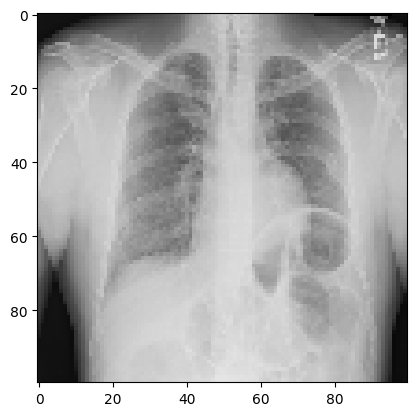

In [69]:
import cv2
import numpy as np
image_path = "images/00000502_000.png"


img = cv2.imread(image_path)
img = cv2.resize(img, (100, 100))

# Convert the image to an array and normalize the pixel values
img_array = np.array(img) / 255.0

# Add a dimension to the image array to make it compatible with the model
img_array = np.expand_dims(img_array, axis=0)

# Pass the image through the model and get the predicted class
predicted_class = model.predict(img_array)
plt.imshow(img)

predicted_class


In [55]:
predicted_class

array([[0.00258713]], dtype=float32)